In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('../input/train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train.shape

(1460, 81)

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Biểu đồ tần suất:
1. Histogram(biểu đồ tần suất): dùng để tóm tắt phân phối dữ liệu.Dữ liệu được chia thành nhiều khoản có cùng độ dài, số điểm được tính trong mỗi khoảng và được vẽ như các thanh trong một biểu đồ tần suất.Trục tung (vertical axis) cho biết tỷ lệ của các quan sát trong mỗi thanh và chiều cao tương đối của các thanh thể hiện mật độ tương đối của số trường hợp (cases) trong các khoảng.
2. "fit = norm" đường phân phối chuẩn(Gauss).
3. Histogram áp dụng cho khi cần xem phân phối của dữ liệu, dữ liệu dạng số  có thể ngắt quãng.z

Tính chất của phân phối chuẩn:
 1. Hàm mật độ là đối xứng qua giá trị trung bình (giá trị kì vọng).
 2. Giá trị trung bình cũng là mode và trung vị của nó.

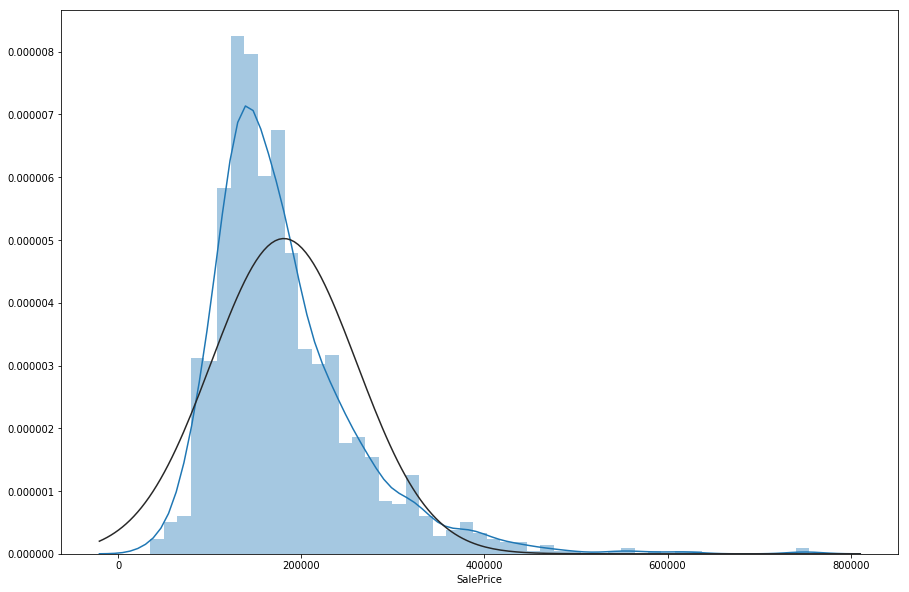

In [8]:
#histogram
plt.subplots(figsize = (15,10))
sns.distplot(df_train['SalePrice'], fit=norm)

- Độ nhọn(kurt()) của phân phối phản ánh độ cao của trung tâm phân phối so với phân phối chuẩn.
- kurtosis của phân phối chuẩn bằng 3.

- Độ lêch(skew()) đo sự cân bằng của phân phối so với phân phối chuẩn.
- Độ lệch được coi là đáng kể nếu giá trị tuyệt đối của nó ≥0.5 (tức là giá trị ≤−0.5 hoặc ≥+0.5)

In [11]:
print("skewness :", df_train['SalePrice'].skew()) #do lech so voi phan phoi chuan

skewness : 1.8828757597682129


In [12]:
print("kurtosis :", df_train['SalePrice'].kurt()) #do nhon 

kurtosis : 6.536281860064529


In [13]:
#Relationship with numerical variables
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series, DataFrame, or Panel objects
        If a dict is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a ValueError will be raised
    axis : {0/'index', 1/'columns'}, default 0
        The axis to concatenate along
    join : {'in

In [5]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.head()

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


In [12]:
help(data.plot.scatter)

Help on method scatter in module pandas.plotting._core:

scatter(x, y, s=None, c=None, **kwds) method of pandas.plotting._core.FramePlotMethods instance
    Create a scatter plot with varying marker point size and color.
    
    The coordinates of each point are defined by two dataframe columns and
    filled circles are used to represent each point. This kind of plot is
    useful to see complex correlations between two variables. Points could
    be for instance natural 2D coordinates like longitude and latitude in
    a map or, in general, any pair of metrics that can be plotted against
    each other.
    
    Parameters
    ----------
    x : int or str
        The column name or column position to be used as horizontal
        coordinates for each point.
    y : int or str
        The column name or column position to be used as vertical
        coordinates for each point.
    s : scalar or array_like, optional
        The size of each point. Possible values are:
    
        - 

Biểu đồ phân tán(plot.scatter(x,y): 
- Vẽ một biến ở trục hoành theo mộtbiến khác ở trục tung.
- Đó là một phương pháp hữu ích để phân tích mối quanhệ giữa hai biến. Ví dụ, nó có thể làm rõ một mối quan hệ phi tuyến giữa hai biến hoặc nó có thể cho thấy có tồn tại các quan sát bất thường hay không.

##### GrLivArea: Above grade (ground) living area square feet

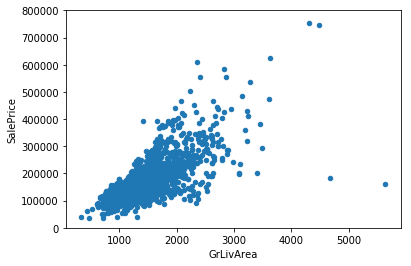

In [6]:
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim= (0,800000))

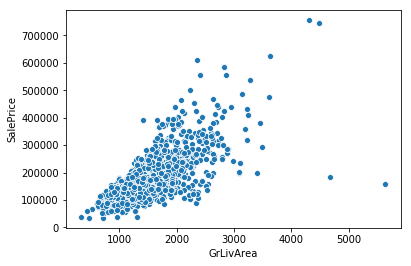

In [8]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)

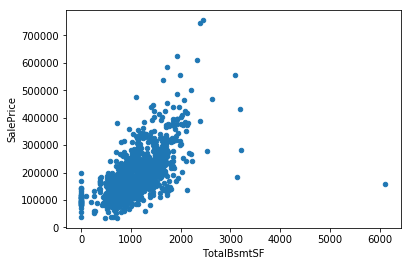

In [16]:
#scatter totalbmstsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['TotalBsmtSF'], df_train['SalePrice']], axis=1)
data.plot.scatter(x= var, y='SalePrice')

GrLivArea có vẻ linear hơn TotalBsmtSF so với SalePrice 

### Relationship with categorical features

In [15]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


##### OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [11]:
var = 'OverallQual'
df_train[var].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [12]:
df_train[var].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

std : độ lệch chuẩn.

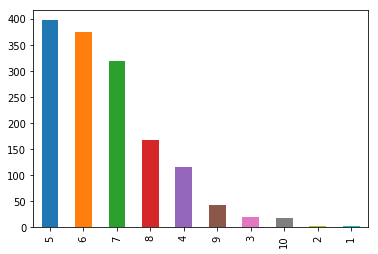

In [15]:
df_train[var].value_counts().plot(kind ='bar')

Hàm sns.countplot(data): hàm này truyền vào data origin, nó sẽ tự đếm số lượng rồi vẽ biểu đồ, giống như thuật toán lừa bò vào chuồng.

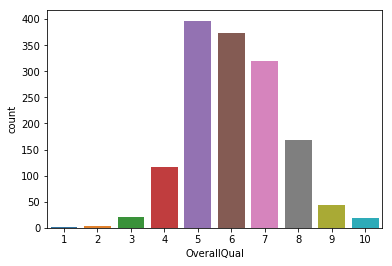

In [18]:
sns.countplot(df_train[var])

In [18]:
sum(df_train[var].value_counts())

1460

In [19]:
data = pd.concat([df_train[var], df_train['SalePrice']], axis=1)

In [20]:
df_train['OverallQual'].head()

0    7
1    6
2    7
3    7
4    8
Name: OverallQual, dtype: int64

Biểu đồ hộp cạnh – kề – cạnh(Boxplot):
1. Biểu đồ hộp cung cấp một dạng trình bày tóm tắt về phân phối của dữ liệu bằng cách cho ta thấy trên đồ thị các phân vị của dữ liệu.
2. Biểu đồ hộp cho biết trung tâm của phân phối (tức median hoặc phân vị thứ 50, Q 0.50 ), độ phân tán (spread) của toàn bộ dữ liệu (tức độ dài của hộp, là khoảng cách từ phân vị thứ 25 (Q 0.25 ) đến phân vị thứ 75 (Q 0.75 )), và các đuôi (tails) của phân phối được trải ra như thế nào (tức độ dài của các ‘râu’ so với hai đáy của chiếc hộp hình chữ nhật)
3. Bất cứ các điểm dữ liệu nào nằm ngoài khoảng của hai giá trị liền kề được gọi là các giá trị ngoại lai (outside values) hoặc cá biết, bất thường (outliers), vàđược vẽ như là một điểm riêng lẻ.

Cách dùng:
Các biểu đồ hộp cạnh – kề – cạnh là một tập hợp các biểu đồ hộp trình bày các phân phối của một số trường hợp hoặc một số biến theo một cách mà chúng ta có thể so sánh không chỉ các thước đo trung tâm mà còn các phân phối của các biến. Như chúng tôi đã đề cập ở trên, bề rộng của các biểu đồ hộp thường là tùy ý để chúng có thể được chia tỷ lệ theo một cách mà chúng ta có thể đặt chúng kế nhau miễn là các khoảng giá trị là tương tự về độ lớn để chúng có thể được vẽ trên cùng một trục tung.

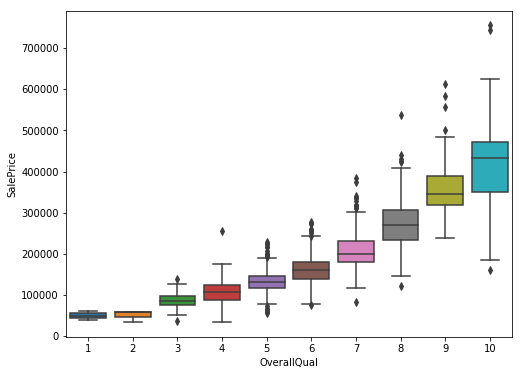

In [21]:
plt.subplots(figsize=(8,6))
sns.boxplot(x=var, y='SalePrice', data =data)

In [22]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

In [23]:
df_train[var].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
1998    25
1958    24
1965    24
1970    24
1954    24
2000    24
2002    23
2008    23
1972    23
1968    22
1971    22
1950    20
2001    20
1957    20
1962    19
1994    19
1966    18
2009    18
1995    18
1940    18
        ..
1986     5
1952     5
1880     4
1929     4
1932     4
1938     4
1983     4
1927     3
1919     3
1934     3
1989     3
1987     3
1912     3
1885     2
1892     2
1890     2
1942     2
1908     2
1882     1
1875     1
1893     1
2010     1
1898     1
1904     1
1905     1
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

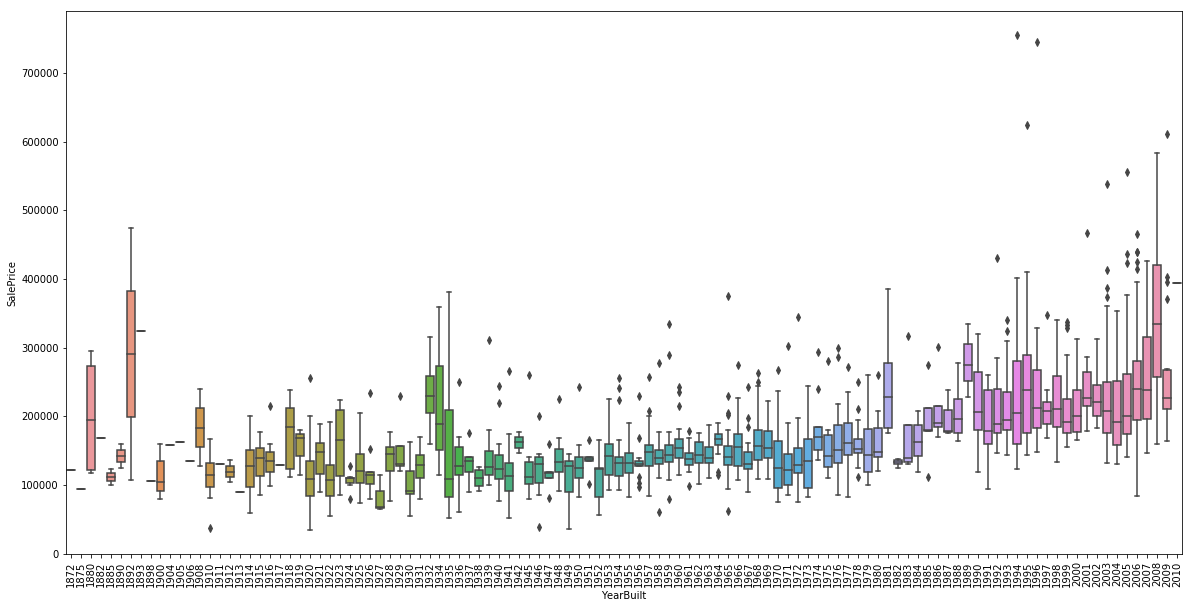

In [24]:
plt.subplots(figsize=(20,10))
sns.boxplot(x=var, y='SalePrice', data=data)
plt.xticks(rotation=90);#xoay tiêu đề trục x 90độ

SalePrice còn phụ thuộc vào một sô ngôi nhà đã cũ.

Kết luận:
1. GrLivArea và TotalBsmtSF điều linear với SalePrice.
2. TotalBsmtSF linear dốc hơn so vơi GrLivArea(tốc độ tăng salePrice nhanh hơn).
3. 'OverallQual' và 'YearBuilt' có ảnh hưởng tới SalePrice, 'OverallQual' có ảnh hưởng nhiều hơn 'YearBuilt'.

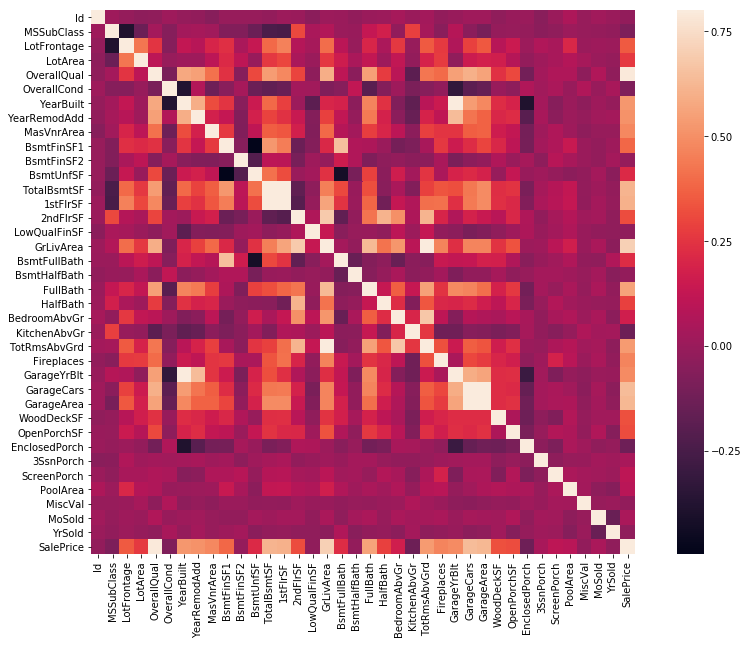

In [25]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(corrmat, square=True, vmax=.8)

In [26]:
#saleprice correlation matrix
k = 10
help(corrmat.nlargest)

Help on method nlargest in module pandas.core.frame:

nlargest(n, columns, keep='first') method of pandas.core.frame.DataFrame instance
    Return the first `n` rows ordered by `columns` in descending order.
    
    Return the first `n` rows with the largest values in `columns`, in
    descending order. The columns that are not specified are returned as
    well, but not used for ordering.
    
    This method is equivalent to
    ``df.sort_values(columns, ascending=False).head(n)``, but more
    performant.
    
    Parameters
    ----------
    n : int
        Number of rows to return.
    columns : label or list of labels
        Column label(s) to order by.
    keep : {'first', 'last'}, default 'first'
        Where there are duplicate values:
    
        - `first` : prioritize the first occurrence(s)
        - `last` : prioritize the last occurrence(s)
    
    Returns
    -------
    DataFrame
        The first `n` rows ordered by the given columns in descending
        order.


In [27]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise the

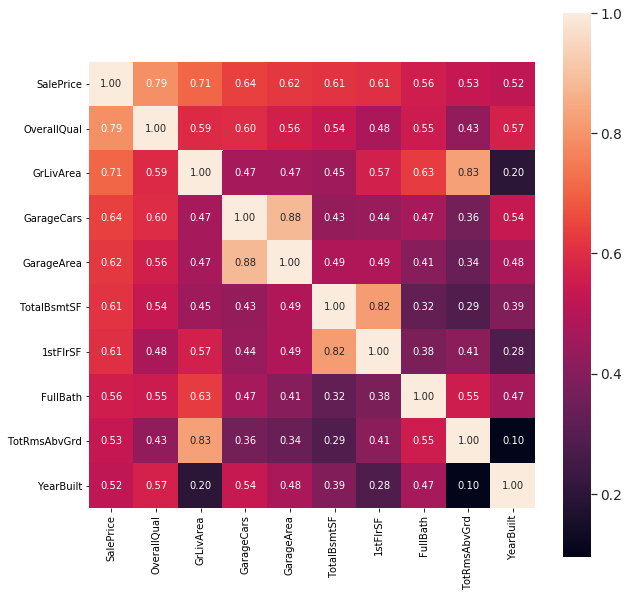

In [28]:
cols =corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(10,10))
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

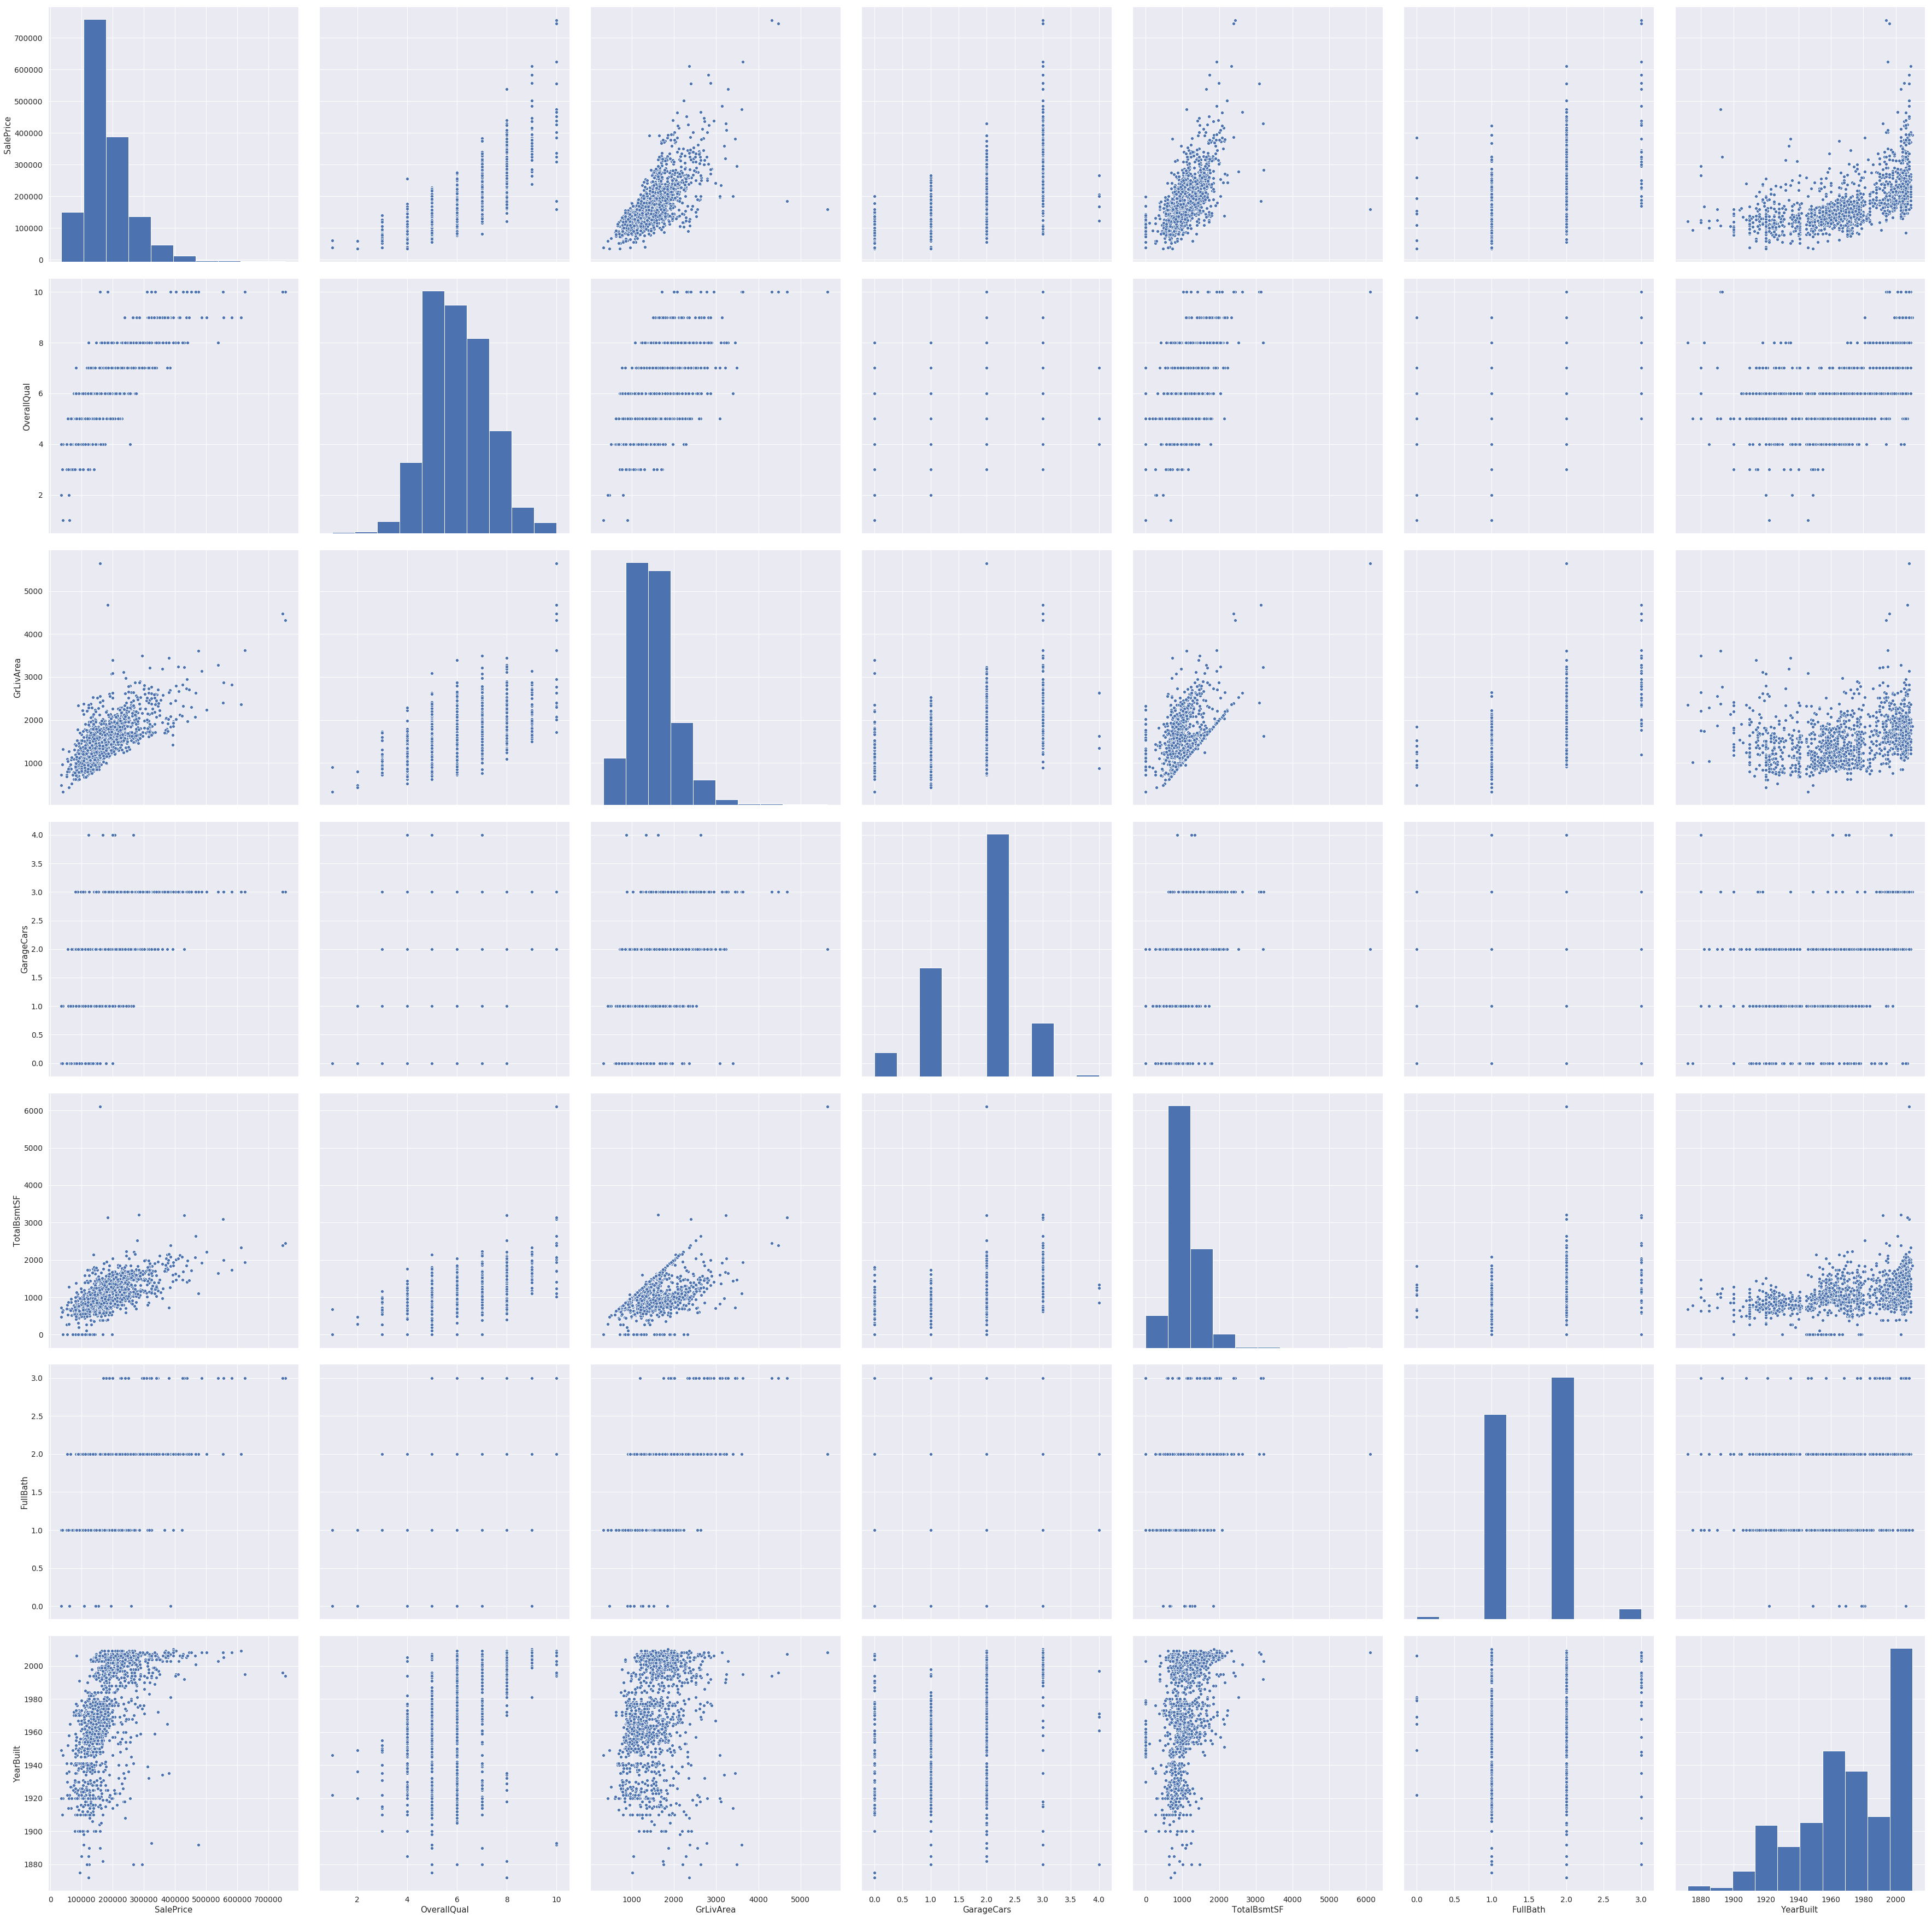

In [29]:
#scatterplot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=7)
plt.show()

### Missing data

In [30]:
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [31]:
missing_data[missing_data['Total'] != 0.0].count()

Total      19
Percent    19
dtype: int64

In [32]:
missing_data.shape

(81, 2)

In [33]:
df_train['PoolQC']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
       ... 
1430    NaN
1431    NaN
1432    NaN
1433    NaN
1434    NaN
1435    NaN
1436    NaN
1437    NaN
1438    NaN
1439    NaN
1440    NaN
1441    NaN
1442    NaN
1443    NaN
1444    NaN
1445    NaN
1446    NaN
1447    NaN
1448    NaN
1449    NaN
1450    NaN
1451    NaN
1452    NaN
1453    NaN
1454    NaN
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: PoolQC, Length: 1460, dtype: object

In [34]:
df_train = df_train.drop((missing_data[missing_data['Total']>1]).index, 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [35]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [36]:
df_train.shape

(1459, 63)

In [37]:
df_train['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [38]:
help(StandardScaler().fit_transform)

Help on method fit_transform in module sklearn.base:

fit_transform(X, y=None, **fit_params) method of sklearn.preprocessing.data.StandardScaler instance
    Fit to data, then transform it.
    
    Fits transformer to X and y with optional parameters fit_params
    and returns a transformed version of X.
    
    Parameters
    ----------
    X : numpy array of shape [n_samples, n_features]
        Training set.
    
    y : numpy array of shape [n_samples]
        Target values.
    
    Returns
    -------
    X_new : numpy array of shape [n_samples, n_features_new]
        Transformed array.



In [39]:
np.newaxis

### Out liars!

chuẩn hóa các dữ liệu thành có giá trị trung bình là 0 và độ lệch chuẩn là 1.
Độ lệch chuẩn, hay độ lệch tiêu chuẩn, là một đại lượng thống kê mô tả dùng để đo mức độ phân tán của một tập dữ liệu đã được lập thành bảng tần số. Có thể tính ra độ lệch chuẩn bằng cách lấy căn bậc hai của phương sai.

#### Univariate analysis

In [40]:
#standardring data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis])

In [41]:
saleprice_scaled

array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ...,
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

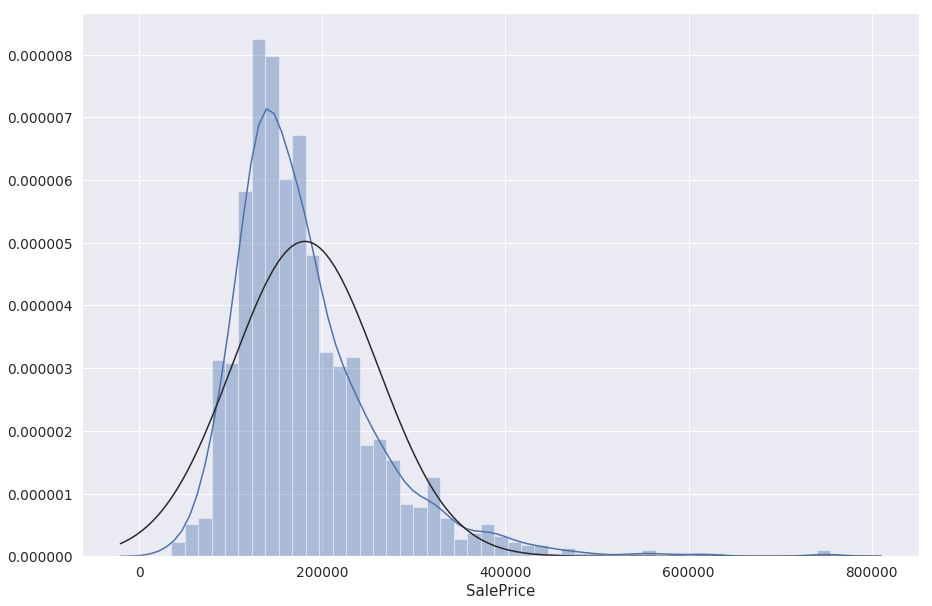

In [42]:
fig = plt.figure(figsize= (15,10))
sns.distplot(df_train['SalePrice'], fit=norm)

In [43]:
saleprice_scaled.shape

(1459, 1)

In [44]:
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

In [45]:
saleprice_scaled.mean()

3.896053383194518e-17

In [46]:
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


#### Bivariate analysis


In [47]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

In [48]:
data.shape

(1459, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


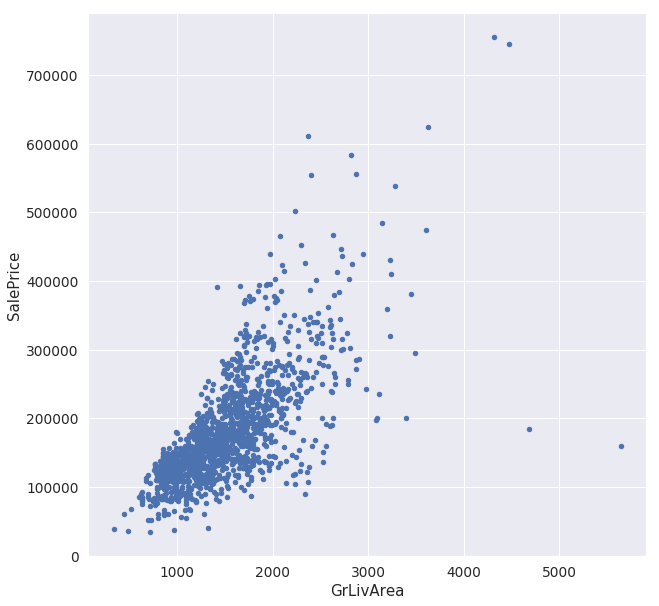

In [49]:
data.plot.scatter(x = var, y = 'SalePrice', figsize = (10,10))

nhận xét:
1. 2 điểm xanh có GrLivArea lớn và giá thấp đó chính là outlier 
2. 2 điểm xanh có GrLivArea cỡ 4200 và SalePrice cao nhất đó có thể là 2 điểm mà khi chuẩn hóa thành saleprice_scaled có giá trị >7.0

In [50]:
#deleting point
help(df_train.sort_values)

Help on method sort_values in module pandas.core.frame:

sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last') method of pandas.core.frame.DataFrame instance
    Sort by the values along either axis
    
    Parameters
    ----------
    by : str or list of str
        Name or list of names to sort by.
    
        - if `axis` is 0 or `'index'` then `by` may contain index
          levels and/or column labels
        - if `axis` is 1 or `'columns'` then `by` may contain column
          levels and/or index labels
    
        .. versionchanged:: 0.23.0
           Allow specifying index or column level names.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must match the length of
         the by.
    inplace : bool, default False
         if True, per

In [51]:
df_train.sort_values(by='GrLivArea', ascending=False)[:2] #df_train chi sort va hien ra, gia tri va vi tri cua van ko thya doi

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [52]:
df_train[['Id','GrLivArea']]

,Id,GrLivArea
0,1,1710
1,2,1262
2,3,1786
3,4,1717
4,5,2198
5,6,1362
6,7,1694
7,8,2090
8,9,1774
9,10,1077


In [53]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

In [54]:
df_train[df_train['Id'] == 1229]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1228,1229,120,RL,8769,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,224,0,0,10,2008,New,Partial,367294


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


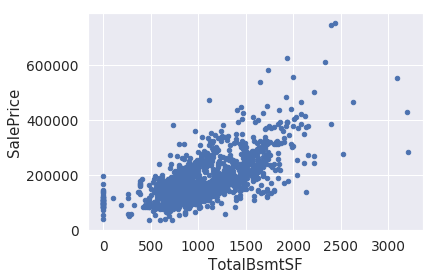

In [55]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x= var, y= 'SalePrice')

In [56]:
#delete data
df_train.sort_values(by='TotalBsmtSF', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,10655,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2009,WD,Normal,284000
496,497,20,RL,12692,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,291,0,0,0,0,5,2007,WD,Normal,430000


### Getting hard core

#### In the search for normality

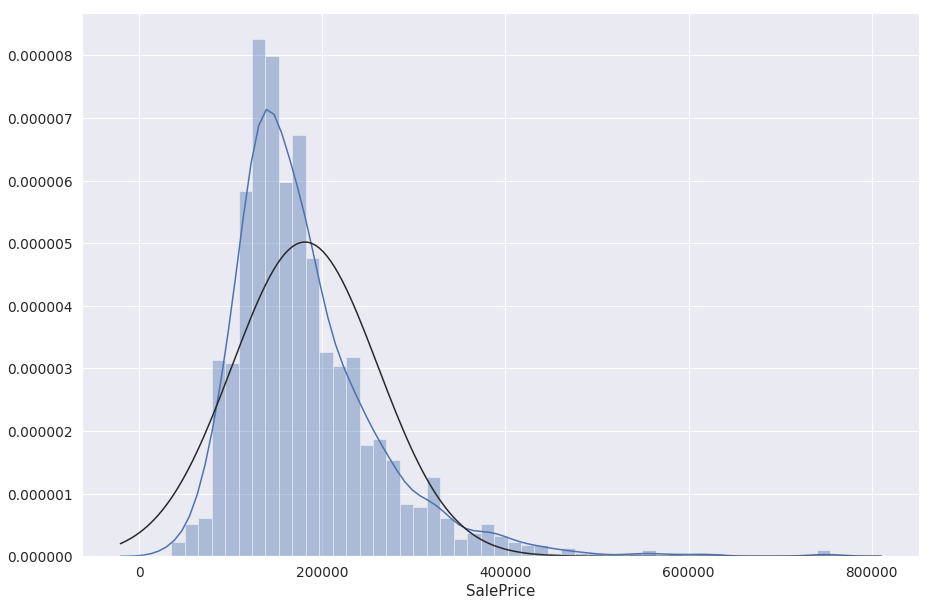

In [57]:
#histogram and normal probability plot
fig =plt.figure(figsize=(15,10))
sns.distplot(df_train['SalePrice'], fit=norm)


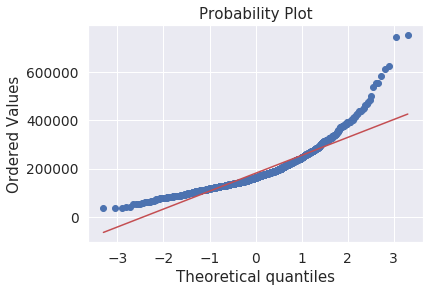

In [58]:
res = stats.probplot(df_train['SalePrice'], plot=plt)

Skewness(độ nghiêng) dương(nghiêng sang trái) và các điểm ko đi theo đường chéo

In [59]:
#tranformation follow log
df_train['SalePrice'] =np.log(df_train['SalePrice'])

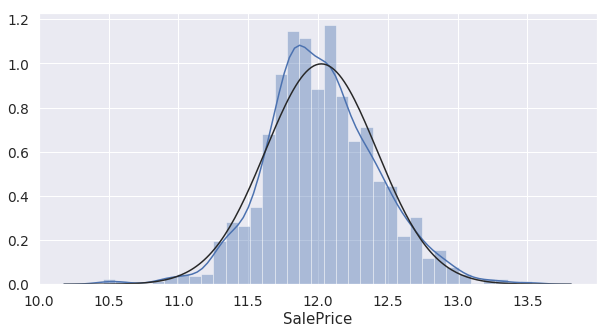

In [60]:
fig = plt.figure(figsize = (10,5))
sns.distplot(df_train['SalePrice'], fit=norm)

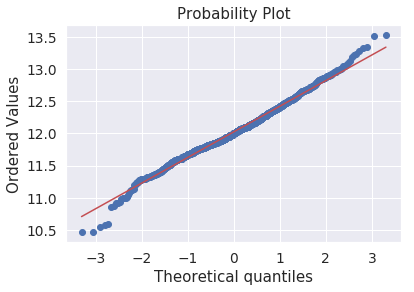

In [61]:
res = stats.probplot(df_train['SalePrice'], plot=plt)

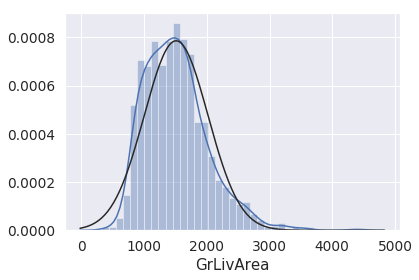

In [62]:
#GrLivArea
sns.distplot(df_train['GrLivArea'], fit=norm)

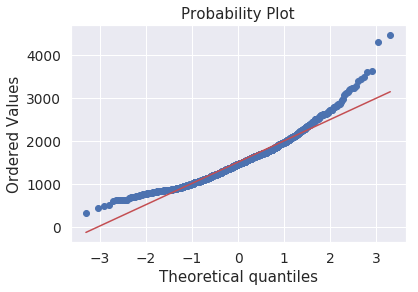

In [63]:
res = stats.probplot(df_train['GrLivArea'], plot=plt)

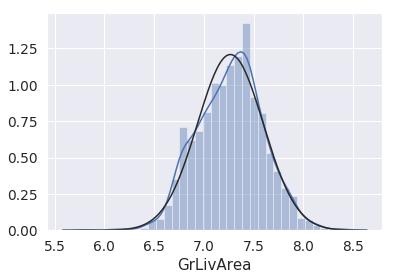

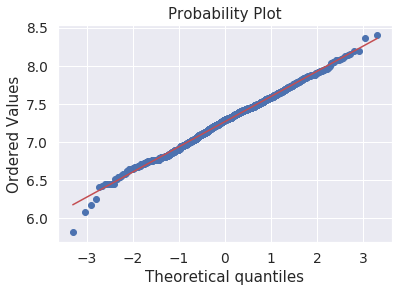

In [64]:
#apply log tranformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res =stats.probplot(df_train['GrLivArea'], plot=plt)

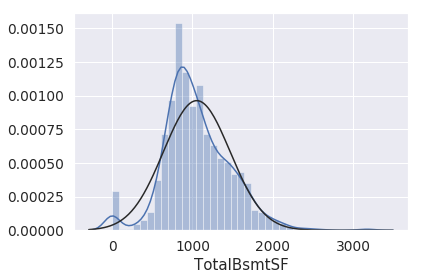

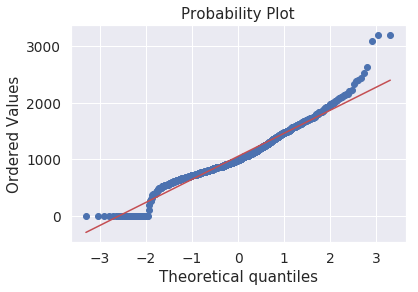

In [65]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [66]:
df_train['TotalBsmtSF'].head()

0     856
1    1262
2     920
3     756
4    1145
Name: TotalBsmtSF, dtype: int64

In [67]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)

In [68]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'HasBsmt'],
      dtype='object')

In [69]:
df_train['HasBsmt'] = 0

In [70]:
help(df_train.loc())

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |  
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |  
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - A ``callable`` function with one argument (the calling Series, DataFrame
 |    or Panel) and that returns valid output for indexing (one of the above)
 |  
 |  See more at :ref:`Selection 

In [71]:
df_train.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

In [72]:
df_train[df_train['HasBsmt'] == 1]['HasBsmt'].value_counts()

1    1420
Name: HasBsmt, dtype: int64

In [73]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

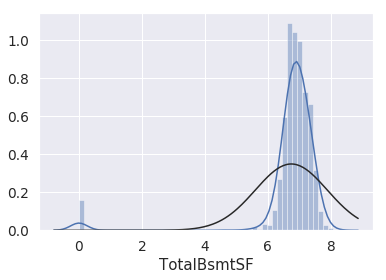

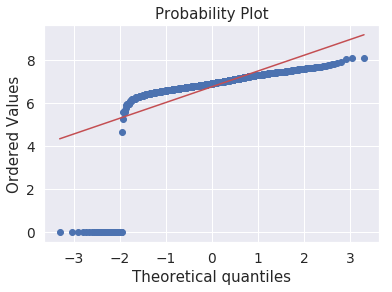

In [74]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [75]:
df_train.shape

(1457, 64)

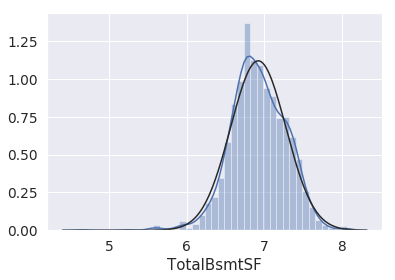

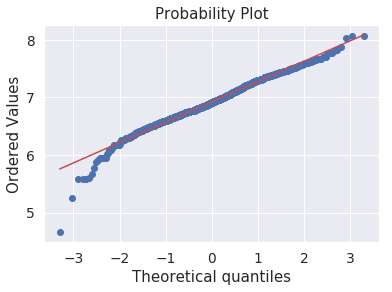

In [76]:
sns.distplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], plot=plt)

Text(0, 0.5, 'SalePrice')

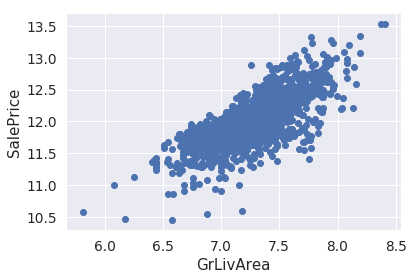

In [77]:
fig = plt.figure()
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

Lúc ban đầu đồ thị khi biểu diễn quan hệ giữ 'GrLivArea' và 'SalePrice' có hình nón. Sau khi tranfer đồi thị biểu diễn chúng đã ko còn hình nón. Đã giải quyết được vấn đề đồng nhất (homoscedasticity).

Text(0, 0.5, 'SalePrice')

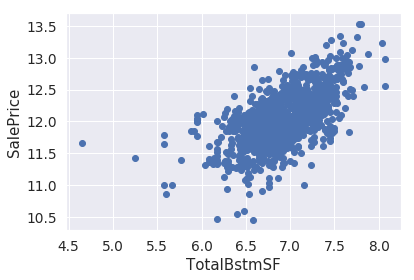

In [78]:
plt.scatter(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF'] > 0]['SalePrice'])
plt.xlabel('TotalBstmSF')
plt.ylabel('SalePrice')

In [79]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

In [80]:
df_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [81]:
from sklearn import linear_model


In [82]:
X_train = df_train[:df_train.shape[0]]

In [83]:
y_train = df_train.SalePrice

In [84]:
model = linear_model.LinearRegression()

In [85]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
X_test = pd.read_csv('../input/test.csv')

In [87]:
X_test = X_test[predictor_cols]

NameError: name 'predictor_cols' is not defined

In [ ]:
y_pre = model.predict(X_test)